# Pseudo-bayesian method

In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from src.benchmark_demo.utilstf import get_spectrogram
from mcsm_benchs.SignalBank import SignalBank
from mcsm_benchs.Benchmark import Benchmark
from src.methods.method_PB import NewMethod

In [2]:
np.random.seed(0) 
# signal parameters
SNRin = 20
N = 2**10
# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_damped_cos()
# s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_synthetic_mixture_5()

noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)


In [3]:
Nfft = 2*N
S, F = get_spectrogram(s,)
F = F[0:N+1]

methodml = NewMethod()
funa = methodml.method
# xr = pb_method(x, Ncomp, use_sst, ds, beta, alpha, div, Pnei, PneiMask)
# use_sst = False
# ds = []
# beta = []
# alpha = [] 
# div = 4
# Pnei = 35
# PneiMask = 20
# M = N
# L = 20
# signal_output = funa(signal, [], use_sst, ds, beta, alpha, div, Pnei, PneiMask, M, L )
signal_output = funa(signal,[],False)
qrf = Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax)
qrf

18.41962133280567

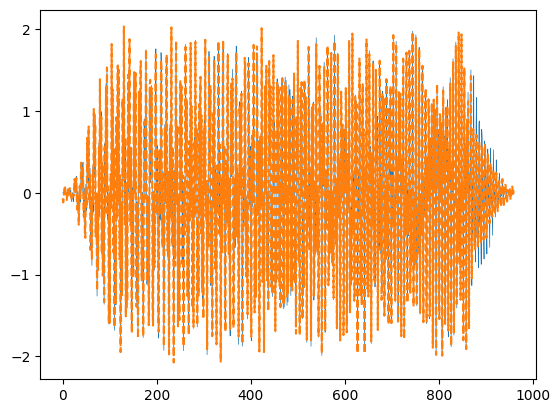

In [4]:
S_output, F_output = get_spectrogram(signal_output,)
F_output = F_output[0:N+1]

plt.figure()
plt.plot(s[tmin:tmax], linewidth=0.5)
plt.plot(signal_output[tmin:tmax],'--')

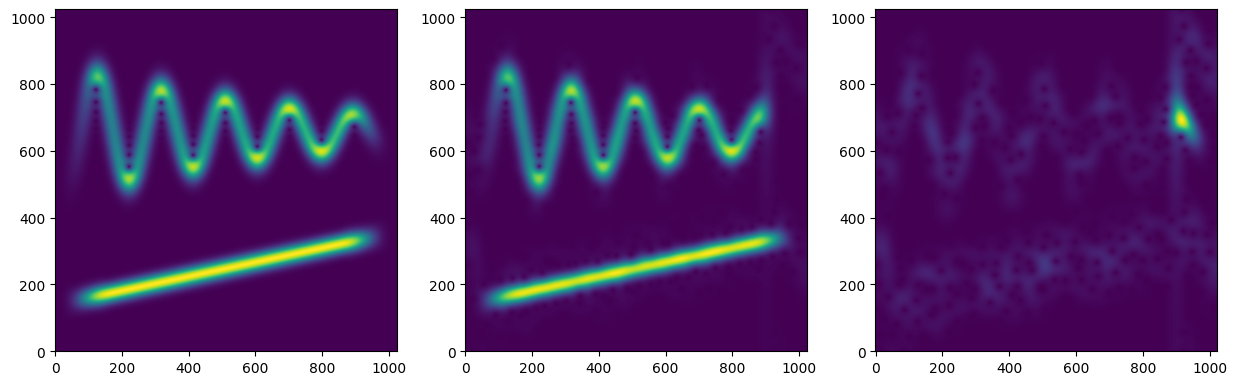

In [5]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
# ax[0].grid(True)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
# ax[1].grid(True)
ax[2].imshow(abs(F-F_output), origin='lower')#, cmap=cmocean.cm.deep)
# ax[1].grid(True)
plt.show()


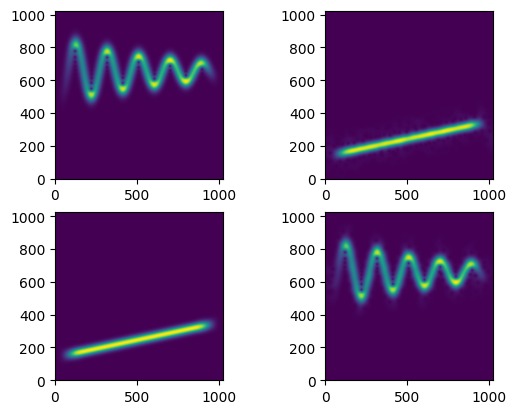

In [6]:
signal_output = funa(signal, [], True, [], [], [], [], [], [], [], [], True)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i],)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[i],)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

plt.show()

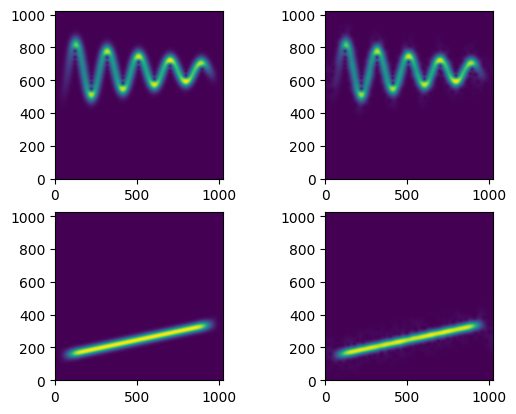

In [7]:
from src.benchmark_demo.perf_metrics import order_components, mse

order = order_components(signal_output,signal.comps)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i],)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[order[i]],)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

0.0015574313319210982
2.881120222586172e-05


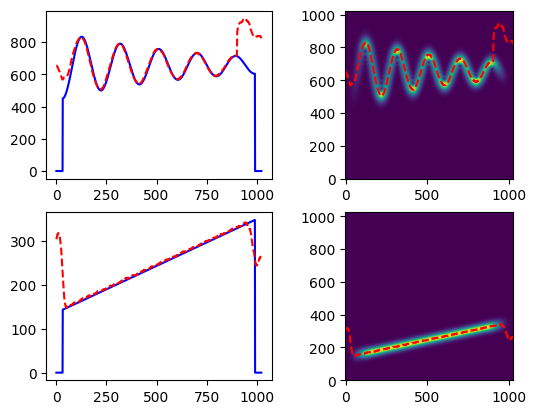

In [8]:
signal_output = funa(signal, [], False, [], [], [], [], [], [], [], [], [],True)
order = order_components(signal_output,signal.instf, minormax = 'min', metric = mse)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i],)
    F = F[0:N+1]
    # S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    # F_output = F_output[0:N+1]

    axs[i,0].plot(signal.instf[i]*Nfft,'b')
    axs[i,0].plot(signal_output[order[i]]*Nfft,'r--')
    print(mse(signal.instf[i], signal_output[order[i]]))
    axs[i,1].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].plot(signal_output[order[i]]*Nfft,'r--')

# print(len(signal.instf))